**Kelompok EDA Mame:**
- Vincent Prisco
- Sisca

In [17]:
#import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import DataFrame

In [18]:
 #read data Transcript Mahasiswa
data1 = pd.read_csv('/content/Dataset1_TranscriptMahasiswa.csv', sep = ';')


In [19]:
#read data Evaluasi Dosen per Matkul
data2 = pd.read_csv('/content/Dataset2_EvaluasiDosenPerMK.csv', sep = ';')

#Data Understanding

##Dataset Transcript Mahasiswa

In [20]:
#menampilkan ukuran row dan column dari dataset transcript mahasiswa
data1.shape

(30870, 8)

In [21]:
#menampilkan list columns dari dataset transcript mahasiswa
data1.columns

Index(['NIM', 'ANGKATAN', 'SEMESTER', 'KODE_MK', 'NAMA_MK', 'SKS', 'NILAI',
       'GRADE'],
      dtype='object')

In [22]:
#menampilkan 5 data teratas dari dataset transcript mahasiswa
data1.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


In [23]:
#cek tipe data dari setiap column
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


In [24]:
#mengecek column yang memiliki data null
data1.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64

##Dataset Evaluasi Dosen Per MK

In [25]:
#cek ukuran row dan column dari dataset evaluasi dosen per matakuliah
data2.shape

(2114, 6)

In [26]:
#menampilkan list columns dari dataset evaluasi dosen
data2.columns

Index(['TAHUN', 'SEMESTER', 'MATAKULIAH', 'PERTANYAAN', 'KETERANGAN', 'NILAI'], dtype='object')

In [27]:
#menampilkan 5 data teratas dari dataset evaluasi dosen
data2.head()

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,"3,28"
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,"3,25"
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,"3,24"
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,"3,3"
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,"3,27"


In [28]:
#cek tipe data dari setiap column
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TAHUN       2114 non-null   int64 
 1   SEMESTER    2114 non-null   int64 
 2   MATAKULIAH  2114 non-null   object
 3   PERTANYAAN  2114 non-null   int64 
 4   KETERANGAN  2114 non-null   object
 5   NILAI       2114 non-null   object
dtypes: int64(3), object(3)
memory usage: 99.2+ KB


In [29]:
#mengecek column yang memiliki data null
data2.isnull().sum()

TAHUN         0
SEMESTER      0
MATAKULIAH    0
PERTANYAAN    0
KETERANGAN    0
NILAI         0
dtype: int64

In [30]:
data1.sort_values(by=['GRADE'], inplace=True)
fig = px.scatter(x=data1['NAMA_MK'], y=data1['GRADE'])

fig.show()

#Data Preparation

##Mengubah tipe data

In [31]:
#mengubah tipe data pada column NIM dari int menjadi object
data1['NIM'] = data1['NIM'].astype('object')

#cek tipe data dari dataset transkrip nilai mahasiswa
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30870 entries, 12503 to 10208
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  object 
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.1+ MB


In [32]:
#mengubah tipe data pada column Nilai dari object menjadi float
data2["NILAI"] = [float(str(i).replace(",", ".")) for i in data2["NILAI"]]
print(data2["NILAI"])

#cek tipe data dari column Nilai
data2.info()

0       3.28
1       3.25
2       3.24
3       3.30
4       3.27
        ... 
2109    3.45
2110    3.41
2111    3.48
2112    3.49
2113    3.48
Name: NILAI, Length: 2114, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TAHUN       2114 non-null   int64  
 1   SEMESTER    2114 non-null   int64  
 2   MATAKULIAH  2114 non-null   object 
 3   PERTANYAAN  2114 non-null   int64  
 4   KETERANGAN  2114 non-null   object 
 5   NILAI       2114 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 99.2+ KB


##Transform column

###Transform kolom ‘MATAKULIAH’ menjadi kolom ‘KODE_MK dan ‘NAMA_MK’

In [33]:
#Kolom ‘MATAKULIAH’ dipecah menjadi kolom ‘KODE_MK’ dan ‘NAMA_MK’ 
data2['KODE_MK'] = data2['MATAKULIAH'].str.split(' ', 1)

In [34]:
#Nilai dari kolom 'KODE_MK' diambil dari 5 karakter terdepan yaitu kode matakuliah 
data2['KODE_MK'] = data2['MATAKULIAH'].apply(lambda x: str(x)[:5])

#Nilai dari kolom 'KODE_MK' diambil setelah 5 karakter terdepan
data2['NAMA_MK'] = data2['MATAKULIAH'].apply(lambda x: str(x)[5:])

In [35]:
#menghapus column 'Matkul'
data2 = data2.drop(['MATAKULIAH'], axis = 1)

data2

,TAHUN,SEMESTER,PERTANYAAN,KETERANGAN,NILAI,KODE_MK,NAMA_MK
0,2015,1511,1,Kesiapan memberikan perkuliahan/praktikum,3.28,IS100,Management Information Systems
1,2015,1511,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25,IS100,Management Information Systems
2,2015,1511,3,Sistematis dalam menyampaikan materi perkuliah...,3.24,IS100,Management Information Systems
3,2015,1511,4,Kemampuan memberikan contoh yang relevan dari ...,3.30,IS100,Management Information Systems
4,2015,1511,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27,IS100,Management Information Systems
...,...,...,...,...,...,...,...
2109,2018,1821,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.45,IS726,Innovation in Information and Technology
2110,2018,1821,11,Kemampuan memotivasi semangat belajar mahasiswa,3.41,IS726,Innovation in Information and Technology
2111,2018,1821,12,"Kemampuan menerima kritik, saran dan pendapat",3.48,IS726,Innovation in Information and Technology
2112,2018,1821,13,Fairness dalam memberikan penilaian,3.49,IS726,Innovation in Information and Technology


###Transform kolom ‘SEMESTER’ menjadi kolom ‘TAHUN_SEMESTER’ dan ‘PERIODE_SEMESTER’

In [36]:
data1['SEMESTER'] = data1['SEMESTER'].astype('string')
data1['TAHUN_SEMESTER']= '20' + data1['SEMESTER'].str.slice(stop=2)
data1['PERIODE_SEMESTER']=data1['SEMESTER'].str.slice(start=2)
data1.loc[data1['PERIODE_SEMESTER'] == '11', 'PERIODE_SEMESTER'] = 'Ganjil'
data1.loc[data1['PERIODE_SEMESTER'] == '21', 'PERIODE_SEMESTER'] = 'Ganjil'
data1.loc[data1['PERIODE_SEMESTER'] == '22', 'PERIODE_SEMESTER'] = 'Genap'

data1

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,TAHUN_SEMESTER,PERIODE_SEMESTER
12503,13110310071,2013,1611,IS747,Administrasi Database 2,3,93.0,A,2016,Ganjil
6902,11110310082,2011,1321,SI612,E-Business,2,88.0,A,2013,Ganjil
6901,11110310082,2011,1321,SI420,Analisis dan Perancangan SI,3,86.0,A,2013,Ganjil
15962,14110310059,2014,1521,IS432,Pengantar E-Business,3,90.0,A,2015,Ganjil
15972,14110310059,2014,1621,IS623,Proyek Sistem Informasi,4,92.0,A,2016,Ganjil
...,...,...,...,...,...,...,...,...,...,...
10183,13110310019,2013,1711,IS534,Pemrograman Aplikasi Mobile,3,51.0,NaN,2017,Ganjil
10188,13110310020,2013,1311,EM100,Dasar-dasar Bisnis,3,73.0,NaN,2013,Ganjil
10196,13110310020,2013,1321,IK402,Komunikasi Interpersonal,2,72.0,NaN,2013,Ganjil
10204,13110310020,2013,1411,SI210,Pemrograman Visual,3,74.0,NaN,2014,Ganjil


###Mengubah nilai pada kolom ‘NAMA_MK’


In [37]:
data1['NAMA_MK'] = data1['NAMA_MK'].replace(['EM100 Dasar-dasar Bisnis','EA100 Pengantar Akuntansi 1','EA410 Sistem Informasi Akuntansi Berbasis ICT 1','EM180 Matematika Bisnis','EM201 Dasar-dasar Manajemen','EM372 Pengantar Ekonomi','EM604 Technopreneurship','IK402 Komunikasi Interpersonal','SI200 Pengantar Sistem Informasi','SI210 Pemrograman Visual','SI214 Manajemen Operasional','SI301 Sistem Informasi Manajemen','SI302 Analisis Proses Bisnis','SI325 Konsep Sistem Operasi','SI415 Inovasi Teknologi Informasi','SI420 Analisis dan Perancangan SI','SI426 Interaksi Manusia Komputer','SI431 Pemrograman Visual Lanjutan','SI511 Managemen Proyek SI','SI520 Sistem dan Aplikasi Perusahaan 1','SI521 Analisis & Perancangan SI Lanjutan','SI522 Decision Support & BI Systems','SI527 Enterprise Resource Planning','SI541 Database Lanjutan','SI612 E-Business','SI624 Sistem dan Aplikasi Perusahaan 2','SI628 ERP Terapan','SI642 Administrasi Database 1','SI643 Pengembangan Aplikasi Database 1','SI661 Proyek Sistem Informasi','SI664 Metode Riset SI','SI723 Keamanan & Audit Sistem Informasi','SI725 Knowledge Management','SI729 Sistem dan Aplikasi Perusahaan 3','SI744 Administrasi Database 2','SI745 Pengembangan Aplikasi Database 2','SI750 Etika Bisnis & Hukum','SI860 Magang Kerja','SI863 Tugas Akhir','SK304 Probabilitas dan Statistika','SK430 Jaringan Komputer','TI100 Algoritma dan Pemrograman','TI101 Matematika Diskrit','TI110 Pengantar Teknologi Multimedia','TI220 Metode Perancangan Program','TI330 Pengantar Teknologi Internet','TI403 Sistem Basis Data','TI532 Pemograman Web','TI751 Seminar ICT','UM121 Bahasa Inggris 1','UM141 Bahasa Indonesia','UM151 Agama','UM160 Pendidikan Kewarganegaraan','UM222 Bahasa Inggris 2']
                                            ,['Dasar-dasar Bisnis','Pengantar Akuntansi 1','Sistem Informasi Akuntansi Berbasis ICT 1','Matematika Bisnis','Dasar-dasar Manajemen','Pengantar Ekonomi','Technopreneurship','Komunikasi Interpersonal','Pengantar Sistem Informasi','Pemrograman Visual','Manajemen Operasional','Sistem Informasi Manajemen','Analisis Proses Bisnis','Konsep Sistem Operasi','Inovasi Teknologi Informasi','Analisis dan Perancangan SI','Interaksi Manusia Komputer','Pemrograman Visual Lanjutan','Managemen Proyek SI','Sistem dan Aplikasi Perusahaan 1','Analisis & Perancangan SI Lanjutan','Decision Support & BI Systems','Enterprise Resource Planning','Database Lanjutan','E-Business','Sistem dan Aplikasi Perusahaan 2','ERP Terapan','Administrasi Database 1','Pengembangan Aplikasi Database 1','Proyek Sistem Informasi','Metode Riset SI','Keamanan & Audit Sistem Informasi','Knowledge Management','Sistem dan Aplikasi Perusahaan 3','Administrasi Database 2','Pengembangan Aplikasi Database 2','Etika Bisnis & Hukum','Magang Kerja','Tugas Akhir','Probabilitas dan Statistika','Jaringan Komputer','Algoritma dan Pemrograman','Matematika Diskrit','Pengantar Teknologi Multimedia','Metode Perancangan Program','Pengantar Teknologi Internet','Sistem Basis Data','Pemograman Web','Seminar ICT','Bahasa Inggris 1','Bahasa Indonesia','Agama','Pendidikan Kewarganegaraan','Bahasa Inggris 2'])

##Input missing values

###Mengisi missing values pada kolom ‘NAMA_MK’ dengan ‘Tugas Akhir’

In [38]:
#nilai yang kosong hanya nilai dengan kode matkul ‘SI863’, maka semua nilai kosong akan diisi dengan nilai ‘Tugas Akhir’.
data1['NAMA_MK'] = data1['NAMA_MK'].fillna(value='Tugas Akhir')

###Mengisi missing value pada kolom 'GRADE'

In [39]:
data1.loc[data1['NILAI'].between(85,101) ,'GRADE'] = 'A'
data1.loc[data1['NILAI'].between(80,84.99) ,'GRADE'] = 'A-'
data1.loc[data1['NILAI'].between(75,79.99) ,'GRADE'] = 'B+'
data1.loc[data1['NILAI'].between(70,74.99) ,'GRADE'] = 'B'
data1.loc[data1['NILAI'].between(65,69.99) ,'GRADE'] = 'B-'
data1.loc[data1['NILAI'].between(60,64.99) ,'GRADE'] = 'C+'
data1.loc[data1['NILAI'].between(55,59.99) ,'GRADE'] = 'C'
data1.loc[data1['NILAI'].between(45,54.99) ,'GRADE'] = 'D'
data1.loc[data1['NILAI'].between(0,44.99) ,'GRADE'] = 'E'
data1.loc[data1['NILAI'] == 0 ,'GRADE'] = 'F'

###Mengisi missing value pada kolom 'NILAI'

In [40]:
data1['NILAI'].fillna("0", inplace = True)

In [41]:
#cek apakah masih ada data yang memiliki missing value
data1.isnull().sum()

NIM                 0
ANGKATAN            0
SEMESTER            0
KODE_MK             0
NAMA_MK             0
SKS                 0
NILAI               0
GRADE               0
TAHUN_SEMESTER      0
PERIODE_SEMESTER    0
dtype: int64

##Menentukan status kelulusan mahasiswa

In [42]:
#Menghitung jumlah SKS yang diambil oleh setiap mahasiswa
data1['Jumlah SKS'] = data1['SKS'].groupby(data1['NIM']).transform('sum')

In [43]:
#Menghitung bobot nilai berdasarkan grade
grades = [
    (data1['GRADE'] == 'A'),
    (data1['GRADE'] == 'A-'),
    (data1['GRADE'] == 'B+'),
    (data1['GRADE'] == 'B'),
    (data1['GRADE'] == 'B-'),
    (data1['GRADE'] == 'C+'),
    (data1['GRADE'] == 'C'),
    (data1['GRADE'] == 'D'),
    (data1['GRADE'] == 'E'),
    (data1['GRADE'] == 'F'),
]

bobot = [4, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.0, 0, 0]

bobot_nilai = np.select(grades, bobot)

In [44]:
#menghitung nilai akhir setiap matakuliah 
data1['Nilai Akhir MK'] = data1['SKS']*bobot_nilai

In [45]:
#menghitung IPS yang didapatkan dengan total semua nilai akhir mata kuliah dibagi dengan total SKS yang diambil per semester.
total_nilai_per_semester = data1.groupby(['NIM', 'SEMESTER'])['Nilai Akhir MK'].transform('sum')
jumlah_sks_per_semester = data1.groupby(['NIM', 'SEMESTER'])['SKS'].transform('sum')
data1['IPS'] = round(total_nilai_per_semester/jumlah_sks_per_semester,2)

In [46]:
#menhitung total IPS mahasiswa dari semua semester
total_semester = data1.groupby(['NIM'])['SEMESTER'].transform('nunique')

list_ips = data1.groupby(['NIM','SEMESTER'])['IPS'].unique()
list_total_ips = list_ips.groupby(['NIM']).sum()


In [47]:
#mengubah list total ips menjadi dictionary
dictionary = list_total_ips.to_dict()

In [48]:
#menginput nilai total IPS pada setiap row berdasarkan NIM mahasiswa yang diambil dari dictionary
total_ips = data1['NIM'].apply(lambda x: dictionary.get(x)).astype(float)


In [49]:
#menghitung nilai IPK 
data1['IPK'] = round(total_ips/total_semester, 2)

In [50]:
#cek status kelulusan mahasiswa
data1['Status Kelulusan'] = np.where((data1['Jumlah SKS'] < 144) | (data1['IPK'] <= 2.5) | (data1['GRADE'].eq('D')) | (data1['GRADE'].eq('E')) | (data1['GRADE'].eq('F')), 'Tidak Lulus', 'Lulus')

In [51]:
data1.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,TAHUN_SEMESTER,PERIODE_SEMESTER,Jumlah SKS,Nilai Akhir MK,IPS,IPK,Status Kelulusan
12503,13110310071,2013,1611,IS747,Administrasi Database 2,3,93.0,A,2016,Ganjil,147,12.0,3.20,2.41,Tidak Lulus
6902,11110310082,2011,1321,SI612,E-Business,2,88.0,A,2013,Ganjil,146,8.0,3.73,2.45,Tidak Lulus
6901,11110310082,2011,1321,SI420,Analisis dan Perancangan SI,3,86.0,A,2013,Ganjil,146,12.0,3.73,2.45,Tidak Lulus
15962,14110310059,2014,1521,IS432,Pengantar E-Business,3,90.0,A,2015,Ganjil,148,12.0,3.23,2.38,Tidak Lulus
15972,14110310059,2014,1621,IS623,Proyek Sistem Informasi,4,92.0,A,2016,Ganjil,148,16.0,3.60,2.38,Tidak Lulus


# EDA

In [52]:
data1.describe()

,ANGKATAN,SKS,Jumlah SKS,Nilai Akhir MK,IPS,IPK
count,30870.000000,30870.000000,30870.000000,30870.000000,30870.000000,30870.000000
mean,2013.852737,2.838063,133.476288,8.651254,3.039590,3.049635
std,2.419875,0.564980,47.589951,3.216557,0.631526,0.536605
min,2010.000000,2.000000,40.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.000000,119.000000,6.600000,2.710000,2.790000
50%,2014.000000,3.000000,144.000000,9.000000,3.110000,3.130000
75%,2016.000000,3.000000,145.000000,11.100000,3.480000,3.410000
max,2018.000000,6.000000,290.000000,24.000000,4.000000,4.000000


In [53]:
print(data1.describe(include=["object"]))

                NIM KODE_MK           NAMA_MK    NILAI  GRADE Status Kelulusan
count         30870   30870             30870  30870.0  30870            30870
unique          770     142               123    102.0     10                2
top     10110310045   EA100  Bahasa Inggris 2     71.0      A            Lulus
freq             98     757               786   1335.0   7964            18162


In [54]:
data2.describe()

,TAHUN,SEMESTER,PERTANYAAN,NILAI
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,2016.496689,1665.966887,7.500000,3.308955
std,1.161880,116.594783,4.032083,0.269830
min,2015.000000,1511.000000,1.000000,2.000000
25%,2015.000000,1521.000000,4.000000,3.170000
50%,2016.000000,1621.000000,7.500000,3.320000
75%,2018.000000,1811.000000,11.000000,3.450000
max,2018.000000,1821.000000,14.000000,4.000000


In [55]:
print(data2.describe(include=["object"]))

                                       KETERANGAN KODE_MK  \
count                                        2114    2114   
unique                                         14      51   
top     Kesiapan memberikan perkuliahan/praktikum   IS201   
freq                                          151      98   

                              NAMA_MK  
count                            2114  
unique                             50  
top      Corporate Business Processes  
freq                               98  


Text(0.5, 1.0, 'Histogram Grade Mahasiswa')

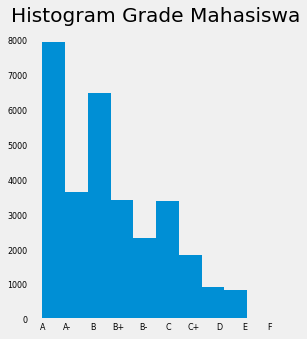

In [56]:
data1.sort_values('GRADE', inplace=True)
plt.style.use('fivethirtyeight')
data1['GRADE'].hist(figsize=(4,5), bins=10, xlabelsize=8, ylabelsize=8)
plt.grid(False)

plt.title('Histogram Grade Mahasiswa')

Text(0.5, 1.0, 'Histogram Evaluasi Nilai Dosen')

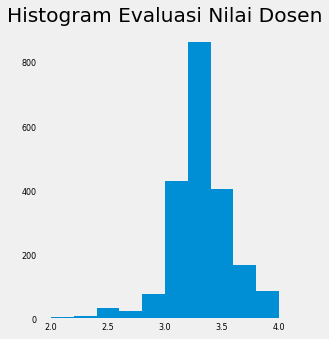

In [57]:
plt.style.use('fivethirtyeight')
data2['NILAI'].hist(figsize=(4,5), bins=10, xlabelsize=8, ylabelsize=8)
plt.grid(False)

plt.title('Histogram Evaluasi Nilai Dosen')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



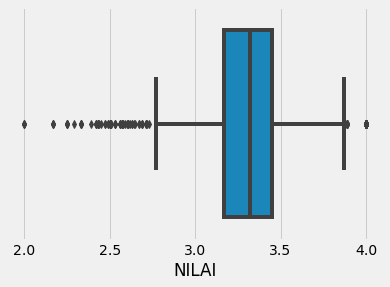

In [58]:
sns.boxplot(data2['NILAI'])

In [59]:
data1['NILAI'] = data1['NILAI'].astype('float')

In [60]:
data1.loc[:, "NILAI"].std()

15.71642955877936

In [61]:
data2.loc[:, "NILAI"].std()

0.2698300017318156

In [62]:
data1.loc[:, "NILAI"].var()

247.0061580760736

In [63]:
data2.loc[:, "NILAI"].var()

0.07280822983459159

In [64]:
data1['NILAI'].mean()

74.32902494331066

In [65]:
data2['NILAI'].mean()

3.3089545884579

In [66]:
#Rata-rata nilai mahasiswa pada setiap mata kuliah
data1['NILAI'].groupby(data1['NAMA_MK']).mean().sort_values()

NAMA_MK
Algoritma dan Struktur Data          45.817259
Pengantar Akuntansi 1                59.282695
Web Design and Development           61.028249
Konsep Sistem Operasi                62.454106
Keamanan Jaringan Lanjutan 3         62.833333
                                       ...    
Pemrograman & Pengembangan Game 1    90.500000
Administrasi Database 2              90.941748
Seminar ICT                          91.067114
SK733 Jaringan Komputer Terapan 3    93.000000
SK632 Jaringan Komputer Terapan 2    98.000000
Name: NILAI, Length: 123, dtype: float64

In [67]:
#Rata-rata penilaian dosen pada setiap pertanyaan evaluasi
data2['NILAI'].groupby(data2['PERTANYAAN']).mean()

PERTANYAAN
1     3.324768
2     3.295629
3     3.300795
4     3.318079
5     3.326093
6     3.275033
7     3.281921
8     3.335960
9     3.299868
10    3.310199
11    3.286556
12    3.310464
13    3.325166
14    3.334834
Name: NILAI, dtype: float64

In [68]:
#Rata-rata penilaian dosen pada setiap mata kuliah

data2['NILAI'].groupby(data2['NAMA_MK']).mean().sort_values()

NAMA_MK
 Algorithm and Data Structure                         2.657857
 Operating Systems Concept                            2.842500
 Visual Programming                                   2.883214
 Business Mathematics                                 3.079286
 Data Mining                                          3.086429
 Operating System Concept                             3.130714
 Mobile Application Development                       3.137857
 Algorithms and Programming                           3.164464
 IT Governance 3                                      3.180357
 Probability and Statistic                            3.182429
 Database Systems                                     3.184762
 Advanced IS Analysis & Design                        3.185857
 Information System Project                           3.186964
 Corporate Database                                   3.195238
 IS Project Management                                3.203095
 Web Design and Development                    